### Stock Market Prediction And Forecasting Using Stacked LSTM

In [5]:
import pandas as pd

In [2]:
from datetime import date
import nsepy
df1 = nsepy.get_history(symbol = 'infy', start=date(2015, 1, 1), end=date(2023, 1, 5))['Close']

In [3]:
df.head()

NameError: name 'df' is not defined

In [8]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [8]:
df1 = df1.reset_index()['Close']


In [9]:
df1


0       1974.40
1       2013.20
2       1995.90
3       1954.20
4       1963.55
         ...   
1981    1508.20
1982    1524.00
1983    1522.55
1984    1494.80
1985    1475.20
Name: Close, Length: 1986, dtype: float64

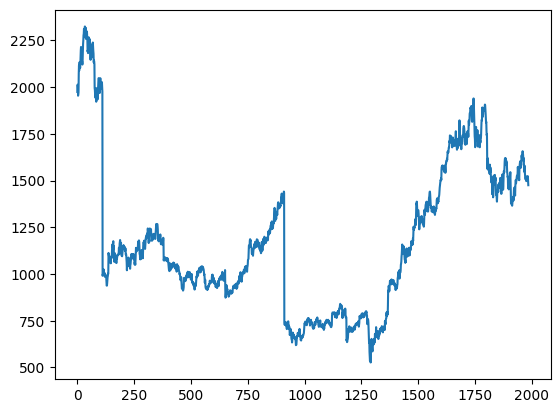

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       1974.40
1       2013.20
2       1995.90
3       1954.20
4       1963.55
         ...   
1981    1508.20
1982    1524.00
1983    1522.55
1984    1494.80
1985    1475.20
Name: Close, Length: 1986, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.8051995 ]
 [0.82677603]
 [0.81715557]
 ...
 [0.55392743]
 [0.53849576]
 [0.52759627]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(1290, 696)

In [18]:
train_data

array([[0.8051995 ],
       [0.82677603],
       [0.81715557],
       ...,
       [0.01584874],
       [0.00436536],
       [0.01062144]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(1189, 100)
(1189,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(595, 100)
(595,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 16s 480ms/step - loss: 0.0183 - val_loss: 0.0354
Epoch 2/100
19/19 [==============================] - 7s 369ms/step - loss: 0.0043 - val_loss: 0.0130
Epoch 3/100
19/19 [==============================] - 7s 373ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 4/100
19/19 [==============================] - 7s 358ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 5/100
19/19 [==============================] - 6s 315ms/step - loss: 0.0026 - val_loss: 0.0047
Epoch 6/100
19/19 [==============================] - 7s 362ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 7/100
19/19 [==============================] - 7s 363ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 8/100
19/19 [==============================] - 7s 350ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 9/100
19/19 [==============================] - 8s 402ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 10/100
19/19 [==============================] - 7s 358ms/step - loss: 0.0018 - val_l

In [40]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 [==============================] - 1s 45ms/step


In [41]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

983.5704487102525

In [43]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1440.8813687430206

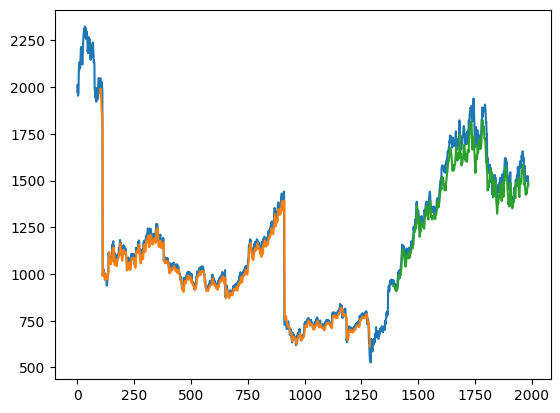

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

696

In [51]:
x_input=test_data[696:].reshape(1,-1)
x_input.shape


(1, 0)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
temp_input

[]

In [54]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        # x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

InvalidArgumentError: Graph execution error:

transpose expects a vector of size 2. But input(1) is a vector of size 3
	 [[{{node transpose}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_predict_function_24247]

In [55]:
day_new=np.arange(1,101)
day_pred=np.arange(101,161)

In [56]:
import matplotlib.pyplot as plt

In [57]:
len(df1)

1986

ValueError: x and y must have same first dimension, but have shapes (100,) and (828, 1)

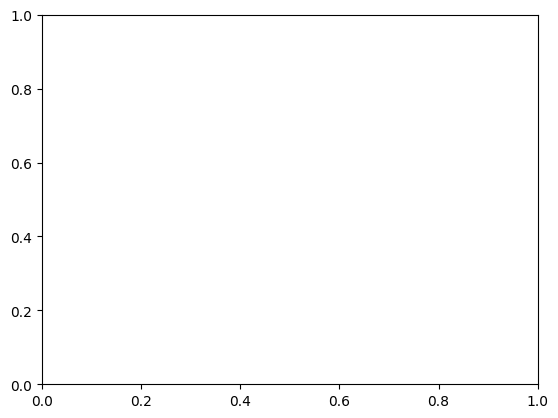

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

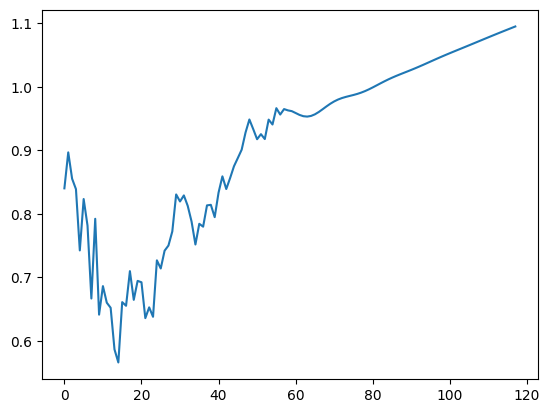

In [93]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [94]:
df3=scaler.inverse_transform(df3).tolist()

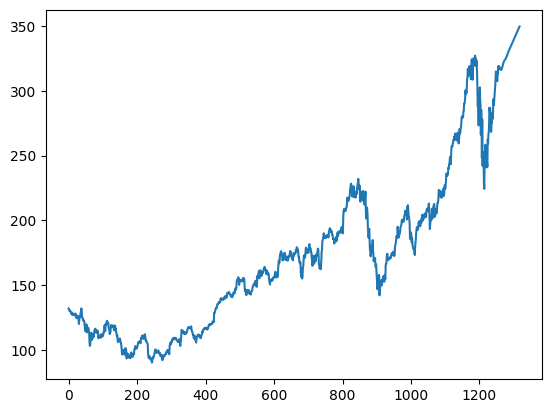

In [95]:
plt.plot(df3)